In [1]:
import numpy as np
from iuvs import scaling
from scipy.optimize import curve_fit
from iuvs import io

In [2]:
def get_ordered_arrays(xsize=40, ysize=50):
    spec = 2*np.arange(xsize*ysize).reshape(xsize, ysize)
    dark = np.arange(xsize*ysize).reshape(xsize, ysize)
    return spec, dark

In [42]:
l1b = io.some_l1b()

In [43]:
spec, dark = l1b.get_light_and_dark(-1)

In [15]:
spec, dark = get_ordered_arrays()

In [44]:
xslice, yslice = io.find_scaling_window(spec)

In [77]:
target = spec[xslice,yslice].ravel()
start = dark[xslice,yslice].ravel()

In [72]:
%matplotlib inline

In [59]:
import seaborn as sns
sns.set_style('white')

In [94]:
plt.rcParams['image.interpolation'] = 'none'

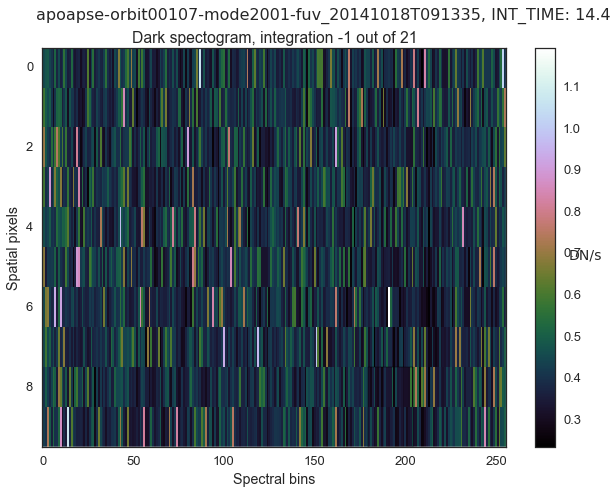

In [95]:
l1b.plot_dark_spectogram(-1)

* If x values have a non-neglibile amount of errors, least-squares method can fail
* combination of different obsverations taken under `different` conditions (like different temperatures maybe?) are supported by the method of `least absolute deviation`.

In [104]:
target_rescaled = (target - target.min())/(target.max() - target.min())

In [105]:
target_rescaled.std()

0.21514664493194111

In [106]:
start_rescaled = (start - start.min())/(start.max() - start.min())

In [107]:
start_rescaled.std()

0.1651733942333872

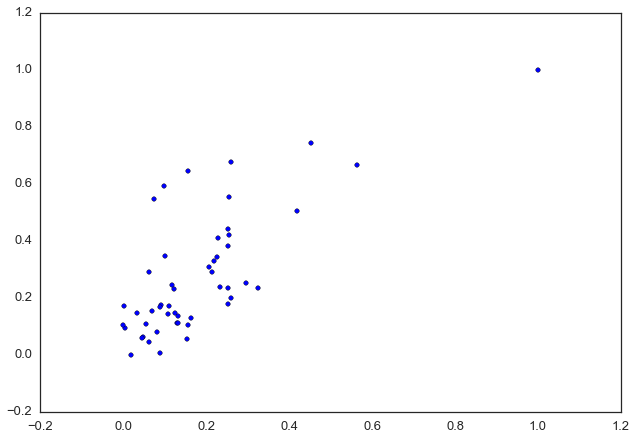

In [108]:
plt.scatter(start_rescaled, target_rescaled)

In [110]:
target_standard = (target - target.mean())/target.std()

In [111]:
start_standard = (start - start.mean())/start.std()

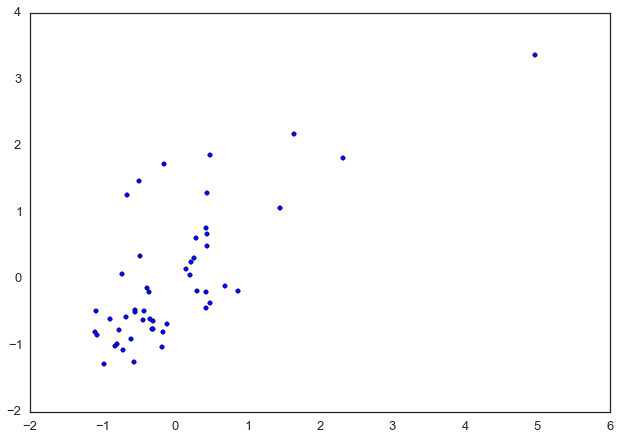

In [114]:
plt.scatter(start_standard, target_standard)

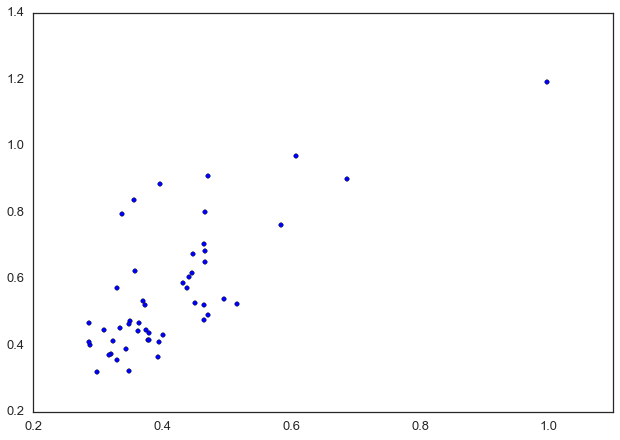

In [109]:
plt.scatter(start, target)

In [80]:
def multmodel(x, a):
    return a*x
def addmodel(x, a):
    return a+x

target_mean = spec[xslice,yslice].mean()
start_mean = dark[xslice,yslice].mean()
result = curve_fit(multmodel, 
                   dark[xslice, yslice].ravel(), 
                   spec[xslice, yslice].ravel(),
                   full_output = True)
print('target/start:', target_mean/start_mean)

target/start: 1.34925157384


In [85]:
sns.set_context('talk')

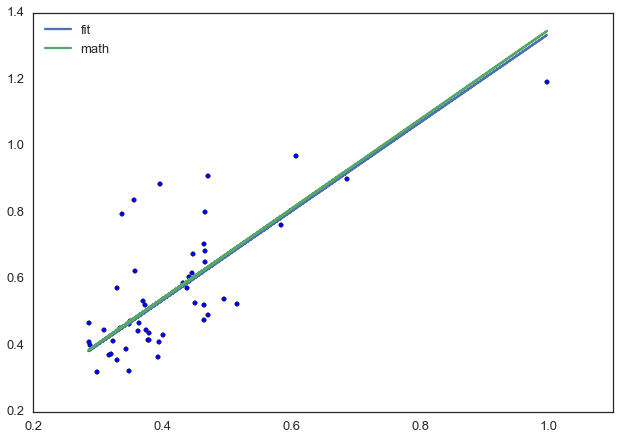

In [86]:
plt.scatter(start, target)
plt.plot(start, result[0]*start, label='fit')
plt.plot(start, target_mean/start_mean*start, label='math')
plt.legend(loc='best')

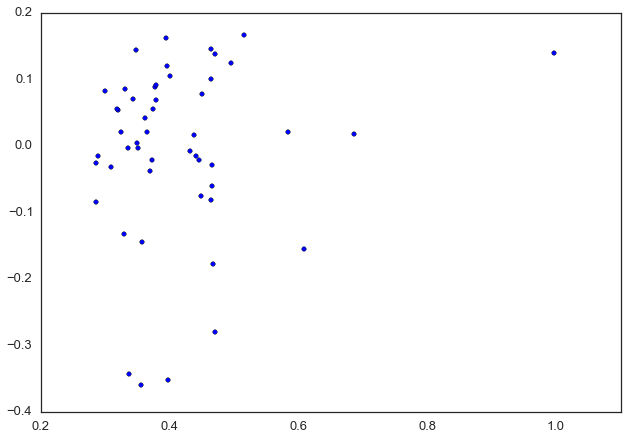

In [91]:
plt.scatter(start, result[2]['f'])

In [87]:
result

(array([ 1.33725575]),
 array([[ 0.00179478]]),
 {'fjac': array([[-3.04523861,  0.11972242,  0.11900979,  0.11694315,  0.15271735,
           0.14195658,  0.11729947,  0.32724128,  0.19960863,  0.10162153,
           0.16946423,  0.09827215,  0.09470898,  0.22554848,  0.10511343,
           0.10447206,  0.1150903 ,  0.10817776,  0.15271735,  0.12463959,
           0.1100306 ,  0.12143274,  0.14487838,  0.13048318,  0.12250169,
           0.1294855 ,  0.09399635,  0.15321619,  0.14395196,  0.15457019,
           0.15293114,  0.12414075,  0.11280987,  0.12998434,  0.11437767,
           0.14808523,  0.19184092,  0.12456833,  0.10846281,  0.15250356,
           0.13169466,  0.14637491,  0.11088576,  0.15449893,  0.14715881,
           0.1230718 ,  0.1065387 ,  0.16269422,  0.09385382,  0.11466272]]),
  'fvec': array([-0.17720549,  0.02031026,  0.04106274, -0.35971426,  0.10020379,
         -0.00807   , -0.14428755,  0.13947014, -0.15524016, -0.03126591,
          0.16644839,  0.08183066, 

In [88]:
from scipy.optimize import leastsq

In [89]:
leastsq?

In [35]:
result[:2]

(array([ 1.33725575]), array([[ 0.00179478]]))

In [40]:
s_sq = (result[2]['fvec']**2).sum()/(len(result[2]['fvec'])-len(result[0]))
s_sq

0.01664384798822021

In [38]:
result[2]

{'fjac': array([[-3.04523861,  0.11972242,  0.11900979,  0.11694315,  0.15271735,
          0.14195658,  0.11729947,  0.32724128,  0.19960863,  0.10162153,
          0.16946423,  0.09827215,  0.09470899,  0.22554848,  0.10511343,
          0.10447206,  0.1150903 ,  0.10817776,  0.15271735,  0.12463959,
          0.1100306 ,  0.12143274,  0.14487838,  0.13048319,  0.12250169,
          0.1294855 ,  0.09399635,  0.15321619,  0.14395196,  0.1545702 ,
          0.15293114,  0.12414075,  0.11280987,  0.12998434,  0.11437767,
          0.14808523,  0.19184092,  0.12456833,  0.10846281,  0.15250356,
          0.13169466,  0.14637491,  0.11088576,  0.15449893,  0.14715881,
          0.1230718 ,  0.1065387 ,  0.16269421,  0.09385382,  0.11466272]]),
 'fvec': array([-0.17720549,  0.02031026,  0.04106274, -0.35971426,  0.10020379,
        -0.00807   , -0.14428755,  0.13947014, -0.15524016, -0.03126591,
         0.16644839,  0.08183066, -0.01492776,  0.01766807,  0.05391758,
         0.05586305, -

In [178]:
def multmodel(x, a):
    return a*x
def addmodel(x, a):
    return a+x

0.00133151303742
-0.924227068097


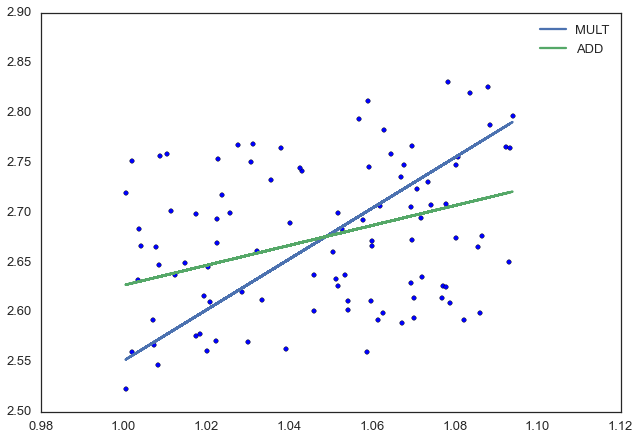

In [179]:
n = 100
dark = np.ones(n)
noise = np.random.rand(n)*0.1*dark
ddark = dark + noise
signal = addmodel(ddark, 1.5)
noise = np.random.rand(n)*0.1*signal
dsignal = signal + noise
multscaler = scaling.MultScaler(ddark, dsignal)
multscaler.do_fit()
addscaler = scaling.AddScaler(ddark, dsignal)
addscaler.do_fit()
dsignal.mean() - ddark.mean()
addscaler.p
dsignal.mean()/ddark.mean()
plt.scatter(ddark, dsignal)
plt.plot(ddark, multscaler.p*ddark, label='MULT')
plt.plot(ddark, addscaler.p+ddark, label='ADD')
plt.legend(loc='best')
print((dsignal - ddark*multscaler.p).mean())
print((dsignal - (ddark+multscaler.p)).mean())

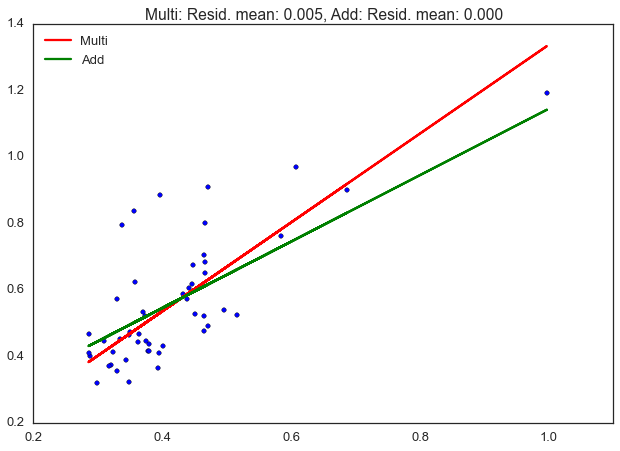

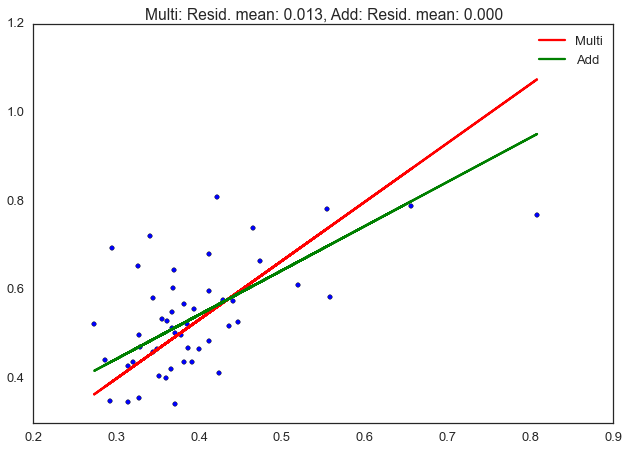

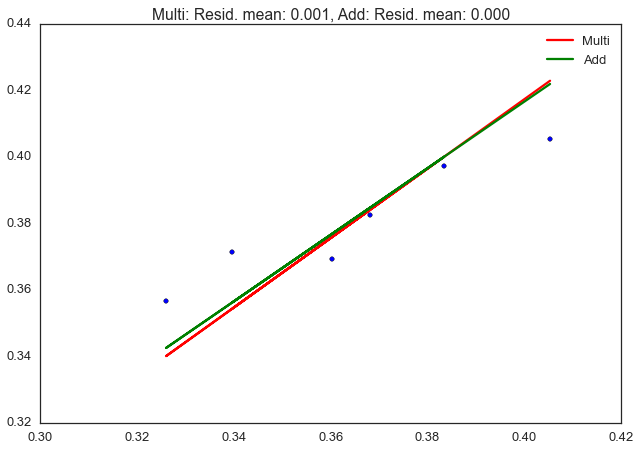

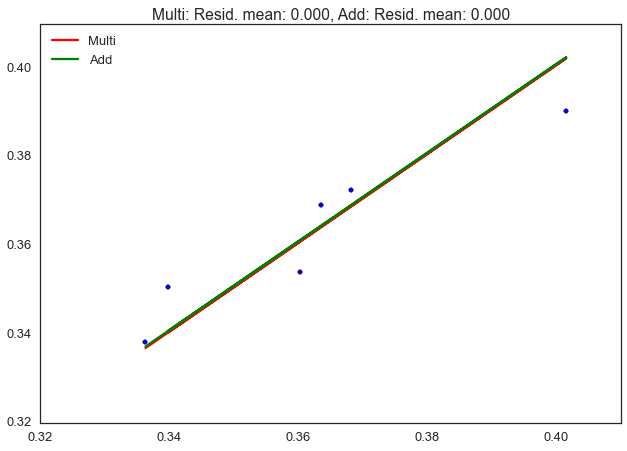

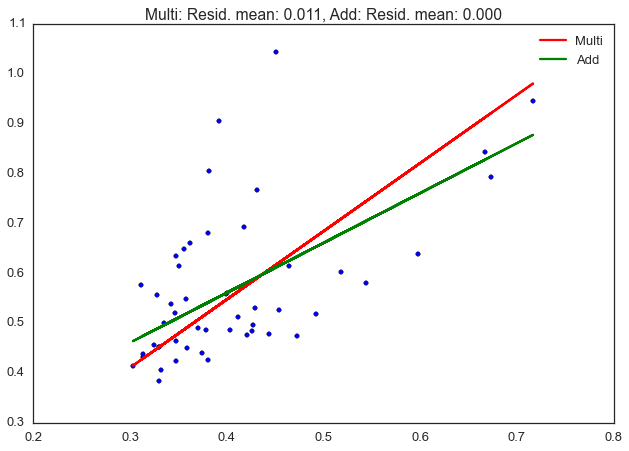

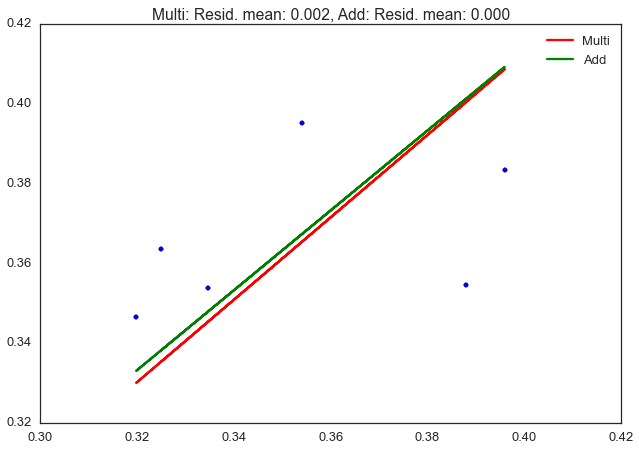

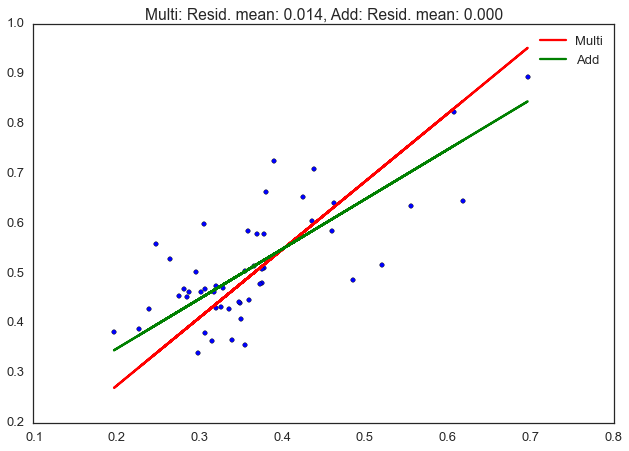

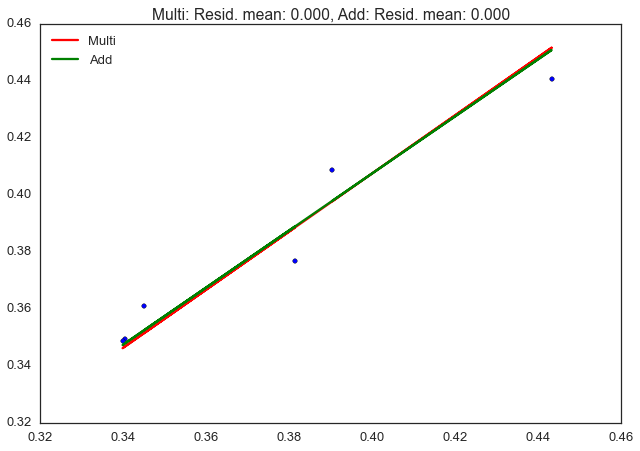

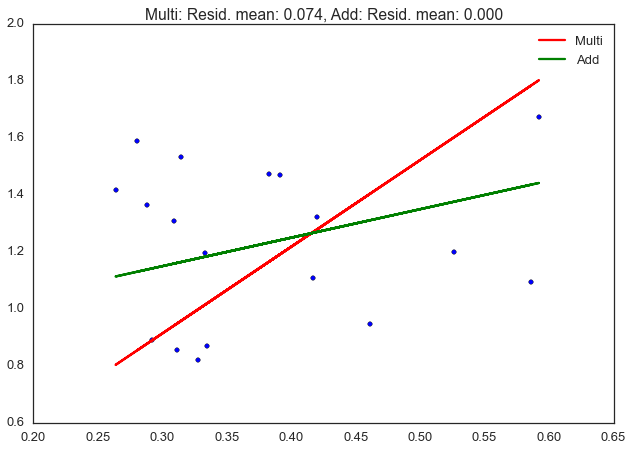

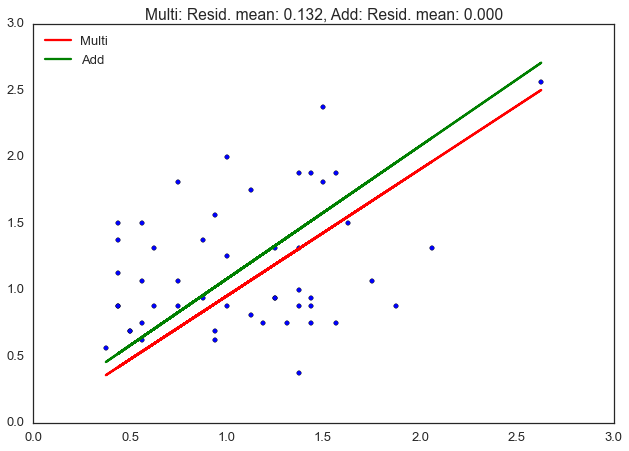

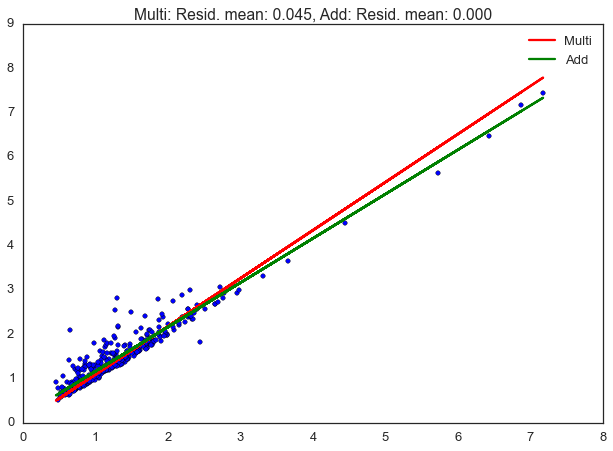

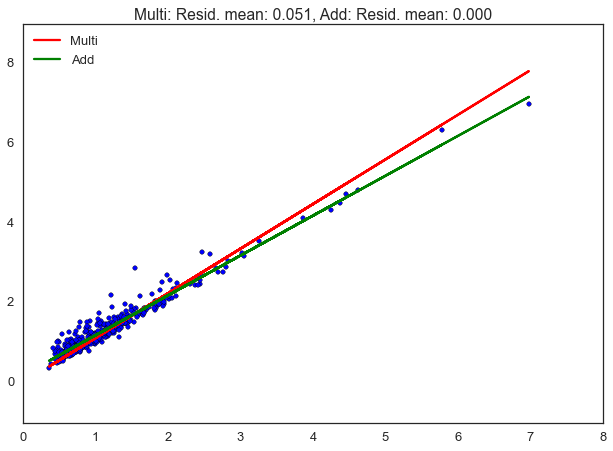

In [189]:
for i, fname in enumerate(io.l1b_filenames()):
    l1b = io.L1BReader(fname)
    spec, dark = l1b.get_light_and_dark(-1)
    xslice, yslice = io.find_scaling_window(spec)
    target = spec[xslice, yslice]
    start = dark[xslice, yslice]
    addscaler = scaling.AddScaler(start, target)
    addscaler.do_fit()
    multscaler = scaling.MultScaler(start, target)
    multscaler.do_fit()
    fig, ax = plt.subplots(nrows=1)
    ax.scatter(start.ravel(), target.ravel())
    ax.plot(start.ravel(), multscaler.scaled.ravel(), 'r', label='Multi')
    ax.plot(start.ravel(), addscaler.scaled.ravel(), 'g', label='Add')
    ax.legend(loc='best')
    ax.set_title('Multi: Resid. mean: {:.3f}, Add: Resid. mean: {:.3f}'
                 .format(multscaler.residual.mean(), addscaler.residual.mean()))

In [190]:
leastsq?

In [212]:
np.reshape?